In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.decomposition import PCA 
white_path = "wine-white.csv"
red_path = "wine-red.csv"

def import_merge_df(file_name1, file_name2):
    df1 = pd.read_csv(file_name1)
    df2 = pd.read_csv(file_name2)
    print(df1.shape)
    print(df2.shape)
    # merge the dataframes 
    df = pd.concat([df1, df2], ignore_index=True)
    return df


df = import_merge_df(red_path, white_path)
df

(1599, 12)
(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### Setup data

Tested a few seeds to find one where the quality median and mean was similar in the training set and testing set. The median did not give us any meaningful insight into the seed. The range of quality values was small so all of the seeds ended up having the same median. We ended up using the mean to determine which seed we should use.  

In [7]:
# generate features and labels
features = df.drop('quality', 1)
labels = df['quality']
# The median didn't tell us much about the data set, labels are pretty narrow. 
print(labels.name+ ' median')
print(labels.median())
print('\n')

# reported and reviewed the mean as well
print(labels.name+ ' mean')
print(labels.mean())
print('\n')

# optimize seeds so the test and train data has similar mean quality
def test_seeds():
    test_prop = 0.25
#     seed = 23
    seeds = range(3000, 3010)
    for seed in seeds:
        X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                        test_size = test_prop, random_state = seed)
        
        # change this to median
        print(seed)
        print('train median: %d' %y_train.median())
        print('test median: %d' %y_test.median())
     
        print('train mean: %f' %y_train.mean())
        print('test mean: %f \n' %y_test.mean())
        
test_seeds()

quality median
6.0


quality mean
5.818377712790519


3000
train median: 6
test median: 6
train mean: 5.825123
test mean: 5.798154 

3001
train median: 6
test median: 6
train mean: 5.818350
test mean: 5.818462 

3002
train median: 6
test median: 6
train mean: 5.817118
test mean: 5.822154 

3003
train median: 6
test median: 6
train mean: 5.821223
test mean: 5.809846 

3004
train median: 6
test median: 6
train mean: 5.817529
test mean: 5.820923 

3005
train median: 6
test median: 6
train mean: 5.814450
test mean: 5.830154 

3006
train median: 6
test median: 6
train mean: 5.821839
test mean: 5.808000 

3007
train median: 6
test median: 6
train mean: 5.824507
test mean: 5.800000 

3008
train median: 6
test median: 6
train mean: 5.829844
test mean: 5.784000 

3009
train median: 6
test median: 6
train mean: 5.812192
test mean: 5.836923 



In [8]:
# use 3001 as the seed

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25, 
                                                    random_state = 3001)

alphas = np.arange(0.0,10.1,0.1)
print(alphas)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]


## Finding ideal number of components and applying PCA

,explained variance
0,0.000000
1,0.954460
2,0.994445
3,0.999213
4,0.999675
5,0.999978
6,0.999987
7,0.999993
8,0.999997
9,1.000000


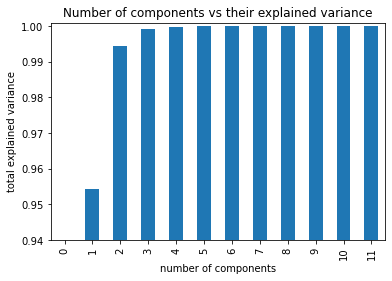

In [9]:
from sklearn.model_selection import train_test_split

#fixed seed for comparing different n_component numbers
seed = 3001
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=seed)

variance={'explained variance':[]}

for k in range(0,12):
    pca = PCA(n_components=k).fit(x_train)
    variance['explained variance'].append(pca.explained_variance_ratio_.sum())

df = pd.DataFrame(variance)

ax = df.plot.bar(ylim=(0.94,1.001),title="Number of components vs their explained variance")
ax.set_xlabel("number of components")
ax.set_ylabel("total explained variance")
ax.get_legend().remove()

df

In [12]:
pca = PCA(n_components=3)
pca.fit(X_train)
pca_X_train = pca.transform(X_train)
pca_X_test = pca.transform(X_test)

The graph above shows different components and their explained variances. As we can see we need 10 components to get 100% explained variation, however since we only have 12 feautres this defeats the goal of dimension reduction. In `Jake VanderPlas`'s `Python Data Science Handbook` he states that having anywhere over 90% of the total variance explained is good enough to model the dataset. In our case all of the explained variances are very high (`1`:`0.953551` to `11`:`1.00000`), while we could model the dataset with just one or two components, we believe that using three would be a better decision since we are significantly reducing the number of dimensions while retaining 99.9% of the explained variance.

## Linear Regression

In [13]:
lr = LinearRegression().fit(X_train, y_train)
lr_pca = LinearRegression().fit(pca_X_train, y_train)
print("Training set score: %f" % lr.score(X_train, y_train))
print("Testing set score: %f" % lr.score(X_test, y_test))

print("Training set score with PCA: %f" % lr_pca.score(pca_X_train, y_train))
print("Testing set score with PCA : %f" % lr_pca.score(pca_X_test, y_test))

Training set score: 0.297718
Testing set score: 0.273965
Training set score with PCA: 0.019179
Testing set score with PCA : 0.014787


In [ ]:
The Linear Regression Model without PCA Applied massively outperforms the linear regression model with PCA appplied.

## Ridge

0.0
Training set score: 0.297718
Testing set score: 0.273965
Training set score with PCA: 0.019179
Testing set score with PCA: 0.014787


0.1
Training set score: 0.295254
Testing set score: 0.272793
Training set score with PCA: 0.019179
Testing set score with PCA: 0.014787


0.2
Training set score: 0.295183
Testing set score: 0.272747
Training set score with PCA: 0.019179
Testing set score with PCA: 0.014787


0.30000000000000004
Training set score: 0.295157
Testing set score: 0.272728
Training set score with PCA: 0.019179
Testing set score with PCA: 0.014787


0.4
Training set score: 0.295141
Testing set score: 0.272716
Training set score with PCA: 0.019179
Testing set score with PCA: 0.014787


0.5
Training set score: 0.295129
Testing set score: 0.272704
Training set score with PCA: 0.019179
Testing set score with PCA: 0.014787


0.6000000000000001
Training set score: 0.295119
Testing set score: 0.272693
Training set score with PCA: 0.019179
Testing set score with PCA: 0.014787


0.7

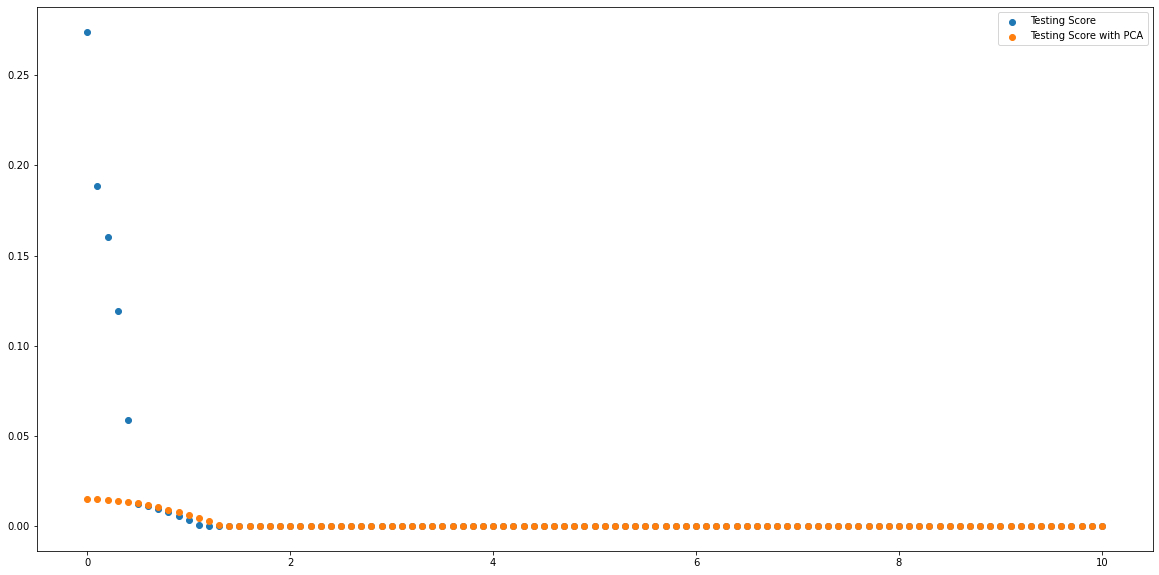

In [30]:
ridge_tr_score = list()
ridge_tst_score = list()
ridge_pca_tr_score = list()
ridge_pca_tst_score = list()

for alpha in alphas:
    print(alpha)
    ridge = Ridge(alpha = alpha).fit(X_train, y_train)
    ridge_pca = Ridge(alpha = alpha).fit(pca_X_train, y_train)
    
    print("Training set score: %f" % ridge.score(X_train, y_train))
    ridge_tr_score.append(ridge.score(X_train, y_train))
    print("Testing set score: %f" % ridge.score(X_test, y_test))
    ridge_tst_score.append(ridge.score(X_test, y_test))
    
    print("Training set score with PCA: %f" % ridge_pca.score(pca_X_train, y_train))
    ridge_pca_tr_score.append(ridge_pca.score(pca_X_train, y_train))
    print("Testing set score with PCA: %f" % ridge_pca.score(pca_X_test, y_test))
    ridge_pca_tst_score.append(ridge_pca.score(pca_X_test, y_test))
    
    print('\n')
    
df = pd.DataFrame(list(zip(alphas,lasso_tst_score, lasso_PCA_tst_score)), columns =['alphas','Testing Score', 'Testing Score with PCA']) 
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(df['alphas'],df['Testing Score'],label='Testing Score')
ax.scatter(df['alphas'],df['Testing Score with PCA'],label='Testing Score with PCA')
ax.legend()
#print(max(ridge_tst_score))

In [ ]:
We can see from the scatter plot above, that Using Ridge regression with pca yields relatively consistent results. However, The untransformed data set massively outperforms the PCA transformed data set when alpha is below 0.5.

## Lasso

0.0
Training set score: 0.297718
Testing set score: 0.273965
Number of features: 11
Training set score with PCA: 0.019179
Testing set score with PCA: 0.014787
Number of features with PCA: 3


0.1
Training set score: 0.223449
Testing set score: 0.188475
Number of features: 4
Training set score with PCA: 0.018290
Testing set score with PCA: 0.014968
Number of features with PCA: 3


0.2
Training set score: 0.187850
Testing set score: 0.160419
Number of features: 3
Training set score with PCA: 0.016885
Testing set score with PCA: 0.014189
Number of features with PCA: 2


0.30000000000000004
Training set score: 0.137403
Testing set score: 0.119373
Number of features: 3
Training set score with PCA: 0.016393
Testing set score with PCA: 0.013849
Number of features with PCA: 2


0.4
Training set score: 0.066794
Testing set score: 0.058791
Number of features: 3
Training set score with PCA: 0.015705
Testing set score with PCA: 0.013310
Number of features with PCA: 2


0.5
Training set score: 0.01

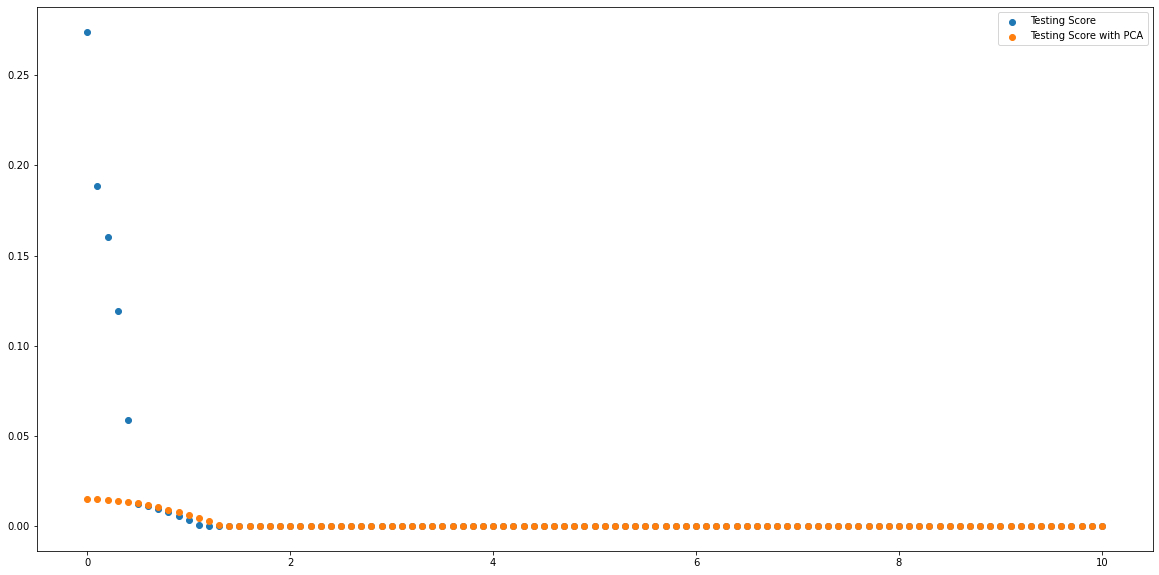

In [31]:
lasso_tr_score = list()
lasso_tst_score = list()

lasso_PCA_tr_score = list()
lasso_PCA_tst_score = list()

for alpha in alphas:
    print(alpha)
    lasso = Lasso(alpha = alpha, max_iter = 100000).fit(X_train, y_train)
    print("Training set score: %f" % lasso.score(X_train, y_train))
    lasso_tr_score.append(lasso.score(X_train, y_train))
    print("Testing set score: %f" % lasso.score(X_test, y_test))
    lasso_tst_score.append(lasso.score(X_test, y_test))
    print("Number of features: %d" % np.sum(lasso.coef_ != 0))
    
    lasso_pca = Lasso(alpha = alpha, max_iter = 100000).fit(pca_X_train, y_train)
    print("Training set score with PCA: %f" % lasso_pca.score(pca_X_train, y_train))
    lasso_PCA_tr_score.append(lasso_pca.score(pca_X_train, y_train))
    print("Testing set score with PCA: %f" % lasso_pca.score(pca_X_test, y_test))
    lasso_PCA_tst_score.append(lasso_pca.score(pca_X_test, y_test))
    print("Number of features with PCA: %d" % np.sum(lasso_pca.coef_ != 0))
    
    
    print('\n')
    
#print(max(lasso_tst_score))
#print(max(lasso_PCA_tst_score))
#print(lasso_PCA_tst_score)
df = pd.DataFrame(list(zip(alphas,lasso_tst_score, lasso_PCA_tst_score)), columns =['alphas','Testing Score', 'Testing Score with PCA']) 
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(df['alphas'],df['Testing Score'],label='Testing Score')
ax.scatter(df['alphas'],df['Testing Score with PCA'],label='Testing Score with PCA')
ax.legend()

We can see from the scatter plot above, that Using lasso with pca yields relatively consistent results, even slightly outperforming the untransformed data set when alpha is 0.5 and above. However, The untransformed data set massively outperforms the PCA transformed data set when alpha is below 0.5.